# Project 4

## Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis

There specific values that I want to look at to see if there are any relations between them and if they are edible or poisonous.  The ones I want to look at are odor, cap-color, gill-color, and habitat.  I feel that looking at these, specifically how they look, how they smell, and where they are, will help spread some light and help with my predictive analysis later on.

### Importing libraries and dataset

I chose to take the dataset and upload it to my personal Github where I could access it for this project

In [10]:
import csv
import pandas as pd 
import numpy as np
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt



#pd.set_option('display.max_columns', 60)  # I have these turned off as it wouldn't make a difference anyway
#pd.set_option('display.max_rows', 60)     # considering how biug the dataset is
mushroom = pd.read_csv("https://raw.githubusercontent.com/bhcooper89/DAV-5400/main/agaricus-lepiota-data.txt")
mushroom

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Now we create our sub-dataframe that contains just the columns that we are trying to do EDA on.

In [11]:
mush_df = pd.DataFrame(mushroom,columns=['class', 'odor', 'cap-color', 'gill-color', 'habitat'])
mush_df

,class,odor,cap-color,gill-color,habitat
0,p,p,n,k,u
1,e,a,y,k,g
2,e,l,w,n,m
3,p,p,w,n,u
4,e,n,g,k,g
...,...,...,...,...,...
8119,e,n,n,y,l
8120,e,n,n,y,l
8121,e,n,n,n,l
8122,p,y,n,b,l


Now I am going to do the first column renaming, there will be a second one after dummy variables are added.  Then using the replace function, I will change the values in the new 'Ediable/Poison Ind' column with all 'e' going to 0 and all 'p' going to 1.

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [12]:
mush_df = mush_df.rename(columns={'class' : 'Edible/Poison Ind', 'odor' : 'Odor Ind', 'cap-color' : 'Cap Color Ind',
                                  'gill-color' : 'Gill Color Ind', 'habitat' : 'Habitat Ind'})
mush_df = mush_df.replace({'Edible/Poison Ind' : {'e' : 0, 'p' : 1}})
mush_df

,Edible/Poison Ind,Odor Ind,Cap Color Ind,Gill Color Ind,Habitat Ind
0,1,p,n,k,u
1,0,a,y,k,g
2,0,l,w,n,m
3,1,p,w,n,u
4,0,n,g,k,g
...,...,...,...,...,...
8119,0,n,n,y,l
8120,0,n,n,y,l
8121,0,n,n,n,l
8122,1,y,n,b,l


Now we can add our dummy variables unsing the get_dummies function.

In [13]:
dum = pd.get_dummies(mush_df)
dum

,Edible/Poison Ind,Odor Ind_a,Odor Ind_c,Odor Ind_f,Odor Ind_l,Odor Ind_m,Odor Ind_n,Odor Ind_p,Odor Ind_s,Odor Ind_y,...,Gill Color Ind_u,Gill Color Ind_w,Gill Color Ind_y,Habitat Ind_d,Habitat Ind_g,Habitat Ind_l,Habitat Ind_m,Habitat Ind_p,Habitat Ind_u,Habitat Ind_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Now we do the second column renaming to make everything clearer.

In [14]:
dum = dum.rename(columns={'Odor Ind_a': 'Odor: Almond', 'Odor Ind_c': 'Odor: Creosote', 'Odor Ind_f': 'Odor: Foul',
       'Odor Ind_l': 'Odor: Anise', 'Odor Ind_m': 'Odor: Musty', 'Odor Ind_n': 'Odor: None',
       'Odor Ind_p': 'Odor: Pungent', 'Odor Ind_s': 'Odor: Spicy','Odor Ind_y': 'Odor: Fishy'})

dum = dum.rename(columns={'Cap Color Ind_b': 'Cap Color: Buff', 'Cap Color Ind_c': 'Cap Color: Cinnamon',
       'Cap Color Ind_e': 'Cap Color: Red', 'Cap Color Ind_g': 'Cap Color: Gray',
       'Cap Color Ind_n': 'Cap Color: Brown', 'Cap Color Ind_p': 'Cap Color: Pink',
       'Cap Color Ind_r': 'Cap Color: Green', 'Cap Color Ind_u': 'Cap Color: Purple',
       'Cap Color Ind_w': 'Cap Color: White', 'Cap Color Ind_y': 'Cap Color: Yellow'})

dum = dum.rename(columns={'Gill Color Ind_b': 'Gill Color: Buff', 'Gill Color Ind_e': 'Gill Color: Red',
       'Gill Color Ind_g': 'Gill Color: Gray', 'Gill Color Ind_h': 'Gill Color: Chocolate',
       'Gill Color Ind_k': 'Gill Color: Black', 'Gill Color Ind_n': 'Gill Color: Brown',
       'Gill Color Ind_o': 'Gill Color: Orange', 'Gill Color Ind_p': 'Gill Color: Pink',
       'Gill Color Ind_r': 'Gill Color: Green', 'Gill Color Ind_u': 'Gill Color: Purple',
       'Gill Color Ind_w': 'Gill Color: White', 'Gill Color Ind_y': 'Gill Color: Yellow'})

dum = dum.rename(columns={'Habitat Ind_d': 'Habitat: Woods', 'Habitat Ind_g': 'Habitat: Grasses',
       'Habitat Ind_l': 'Habitat: Leaves', 'Habitat Ind_m': 'Habitat: Meadows', 'Habitat Ind_p': 'Habitat: Paths',
       'Habitat Ind_u': 'Habitat: Urban', 'Habitat Ind_w': 'Habitat: Waste'})
dum.columns

Index(['Edible/Poison Ind', 'Odor: Almond', 'Odor: Creosote', 'Odor: Foul',
       'Odor: Anise', 'Odor: Musty', 'Odor: None', 'Odor: Pungent',
       'Odor: Spicy', 'Odor: Fishy', 'Cap Color: Buff', 'Cap Color: Cinnamon',
       'Cap Color: Red', 'Cap Color: Gray', 'Cap Color: Brown',
       'Cap Color: Pink', 'Cap Color: Green', 'Cap Color: Purple',
       'Cap Color: White', 'Cap Color: Yellow', 'Gill Color: Buff',
       'Gill Color: Red', 'Gill Color: Gray', 'Gill Color: Chocolate',
       'Gill Color: Black', 'Gill Color: Brown', 'Gill Color: Orange',
       'Gill Color: Pink', 'Gill Color: Green', 'Gill Color: Purple',
       'Gill Color: White', 'Gill Color: Yellow', 'Habitat: Woods',
       'Habitat: Grasses', 'Habitat: Leaves', 'Habitat: Meadows',
       'Habitat: Paths', 'Habitat: Urban', 'Habitat: Waste'],
      dtype='object')

Now we can check the distribution of of the values across the different variables.

First thing is checking the each odor against the 'Edible/Poison Ind' to see their distribution.

Source: https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9

Source: https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

Source: https://matplotlib.org/stable/gallery/color/named_colors.html

Source: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

[Text(0, 0.5, '')]

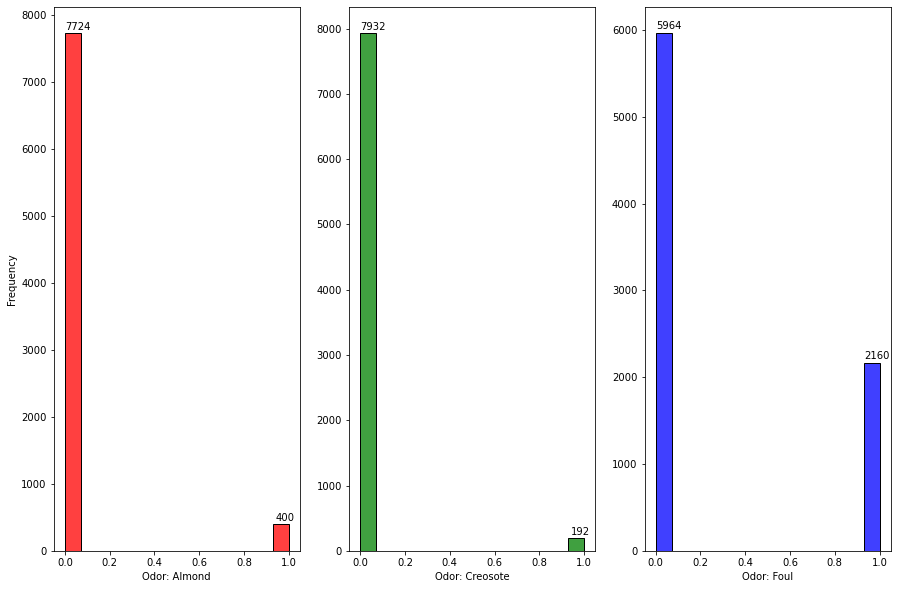

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x="Odor: Almond", color="r", ax=axs[0])
ax.text(0.0, 7774, '7724')
ax.text(0.94, 450, '400')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x="Odor: Creosote", color="g", ax=axs[1])
ax.text(0.0, 7982, '7932')
ax.text(0.94, 242, '192')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x="Odor: Foul", color="b", ax=axs[2])
ax.text(0.0, 6014, '5964')
ax.text(0.93, 2210, '2160')
ax.set(ylabel='')

[Text(0, 0.5, '')]

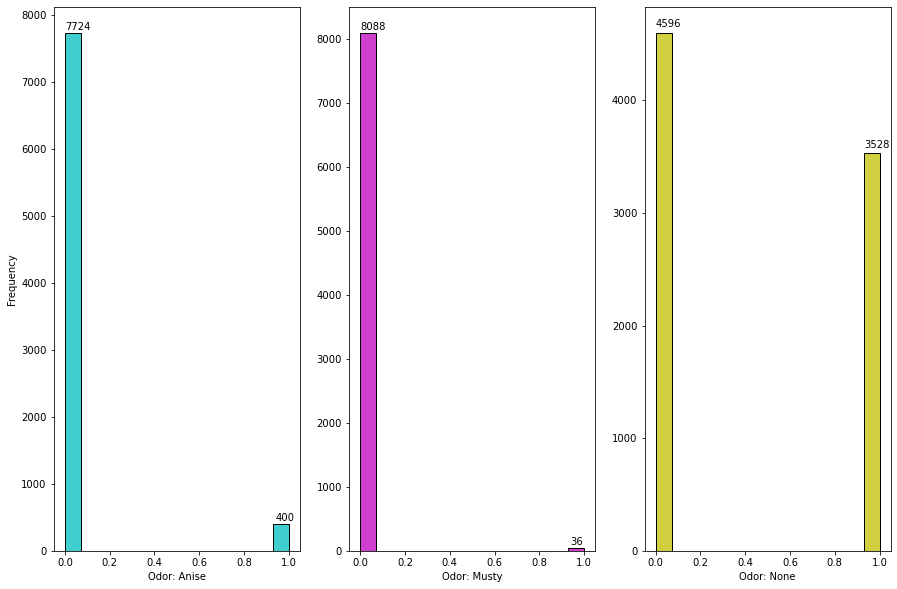

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x="Odor: Anise", color="c", ax=axs[0])
ax.text(0.0, 7774, '7724')
ax.text(0.94, 450, '400')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x="Odor: Musty", color="m", ax=axs[1])
ax.text(0.0, 8138, '8088')
ax.text(0.94, 86, '36')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x="Odor: None", color="y", ax=axs[2])
ax.text(0.0, 4646, '4596')
ax.text(0.93, 3578, '3528')
ax.set(ylabel='')

[Text(0, 0.5, '')]

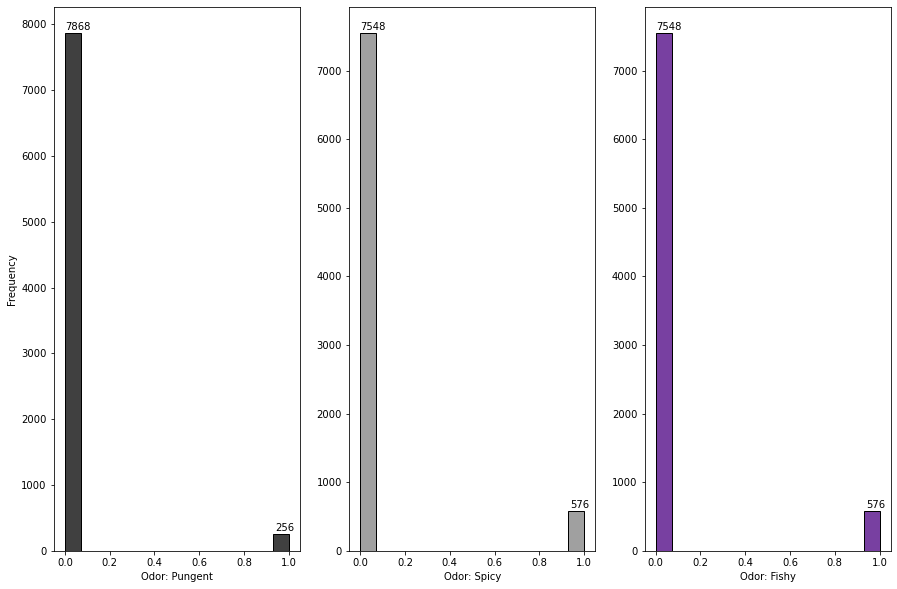

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x="Odor: Pungent", color="k", ax=axs[0])
ax.text(0.0, 7918, '7868')
ax.text(0.94, 306, '256')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x="Odor: Spicy", color="grey", ax=axs[1])
ax.text(0.0, 7598, '7548')
ax.text(0.94, 626, '576')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x="Odor: Fishy", color="indigo", ax=axs[2])
ax.text(0.0, 7598, '7548')
ax.text(0.94, 626, '576')
ax.set(ylabel='')

For a non-visual display, we can use the value_counts function to see the breakdown.

In [28]:
dum['Odor: Almond'].value_counts()

0    7724
1     400
Name: Odor: Almond, dtype: int64

In [29]:
dum['Odor: Creosote'].value_counts()

0    7932
1     192
Name: Odor: Creosote, dtype: int64

In [30]:
dum['Odor: Foul'].value_counts()

0    5964
1    2160
Name: Odor: Foul, dtype: int64

In [31]:
dum['Odor: Anise'].value_counts()

0    7724
1     400
Name: Odor: Anise, dtype: int64

In [32]:
dum['Odor: Musty'].value_counts()

0    8088
1      36
Name: Odor: Musty, dtype: int64

In [33]:
dum['Odor: None'].value_counts()

0    4596
1    3528
Name: Odor: None, dtype: int64

In [34]:
dum['Odor: Pungent'].value_counts()

0    7868
1     256
Name: Odor: Pungent, dtype: int64

In [35]:
dum['Odor: Spicy'].value_counts()

0    7548
1     576
Name: Odor: Spicy, dtype: int64

In [36]:
dum['Odor: Fishy'].value_counts()

0    7548
1     576
Name: Odor: Fishy, dtype: int64

Now we can do the same thing with the remaining 3 variable sections: Cap Color, Gill Color, and Habitat.

Starting with Cap Color:

[Text(0, 0.5, '')]

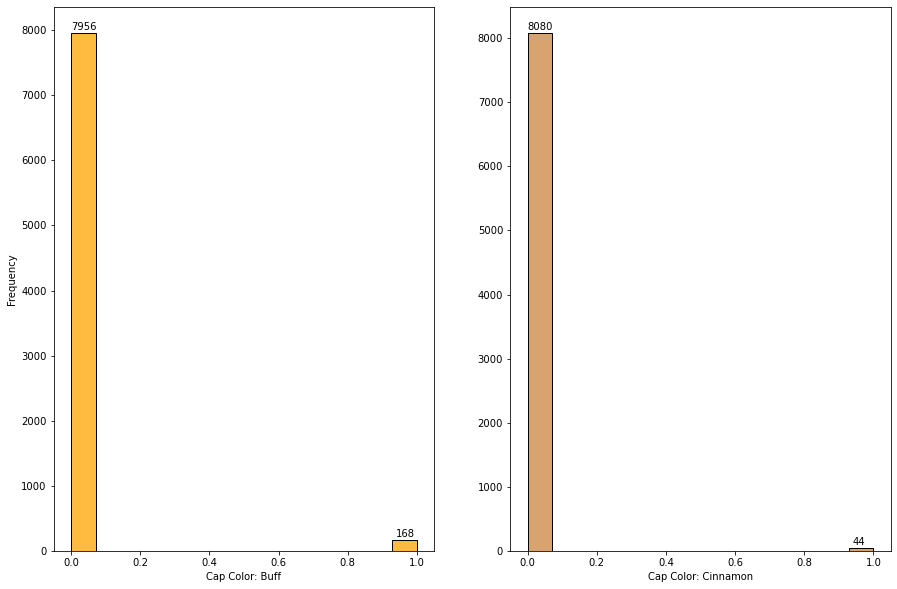

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Cap Color: Buff', color="orange", ax=axs[0])
ax.text(0.0, 8006, '7956')
ax.text(0.94, 218, '168')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Cap Color: Cinnamon', color="peru", ax=axs[1])
ax.text(0.0, 8130, '8080')
ax.text(0.94, 94, '44')
ax.set(ylabel='')

In [39]:
dum['Cap Color: Buff'].value_counts()

0    7956
1     168
Name: Cap Color: Buff, dtype: int64

In [40]:
dum['Cap Color: Cinnamon'].value_counts()

0    8080
1      44
Name: Cap Color: Cinnamon, dtype: int64

[Text(0, 0.5, '')]

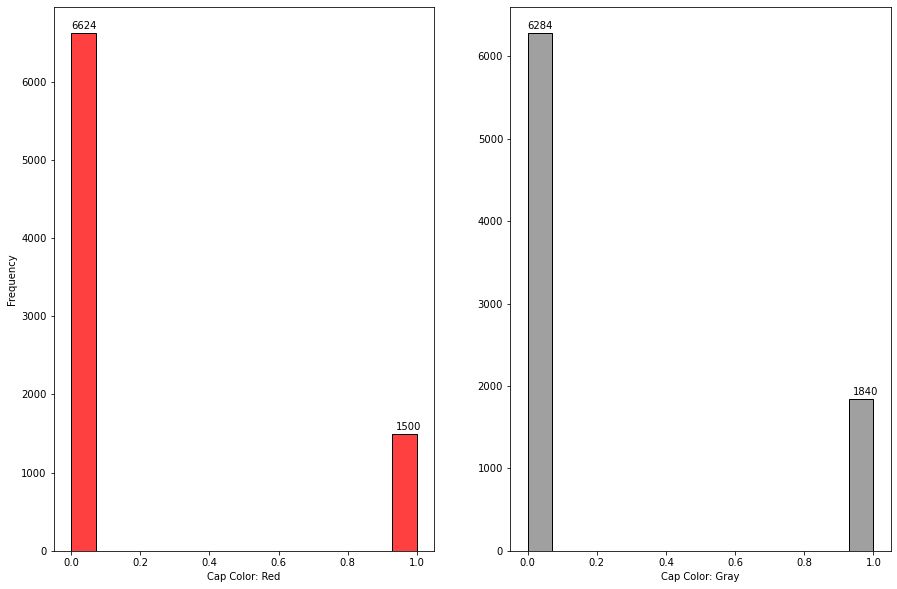

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Cap Color: Red', color="red", ax=axs[0])
ax.text(0.0, 6674, '6624')
ax.text(0.94, 1550, '1500')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Cap Color: Gray', color="gray", ax=axs[1])
ax.text(0.0, 6334, '6284')
ax.text(0.94, 1890, '1840')
ax.set(ylabel='')

In [42]:
dum['Cap Color: Red'].value_counts()

0    6624
1    1500
Name: Cap Color: Red, dtype: int64

In [43]:
dum['Cap Color: Gray'].value_counts()

0    6284
1    1840
Name: Cap Color: Gray, dtype: int64

[Text(0, 0.5, '')]

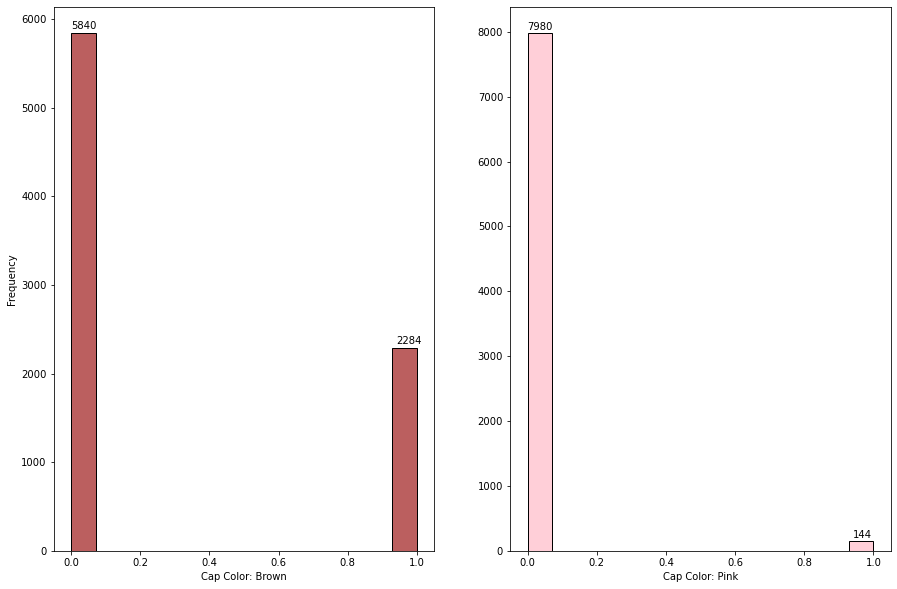

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Cap Color: Brown', color="brown", ax=axs[0])
ax.text(0.0, 5890, '5840')
ax.text(0.94, 2334, '2284')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Cap Color: Pink', color="pink", ax=axs[1])
ax.text(0.0, 8030, '7980')
ax.text(0.94, 194, '144')
ax.set(ylabel='')

In [48]:
dum['Cap Color: Brown'].value_counts()

0    5840
1    2284
Name: Cap Color: Brown, dtype: int64

In [49]:
dum['Cap Color: Pink'].value_counts()

0    7980
1     144
Name: Cap Color: Pink, dtype: int64

[Text(0, 0.5, '')]

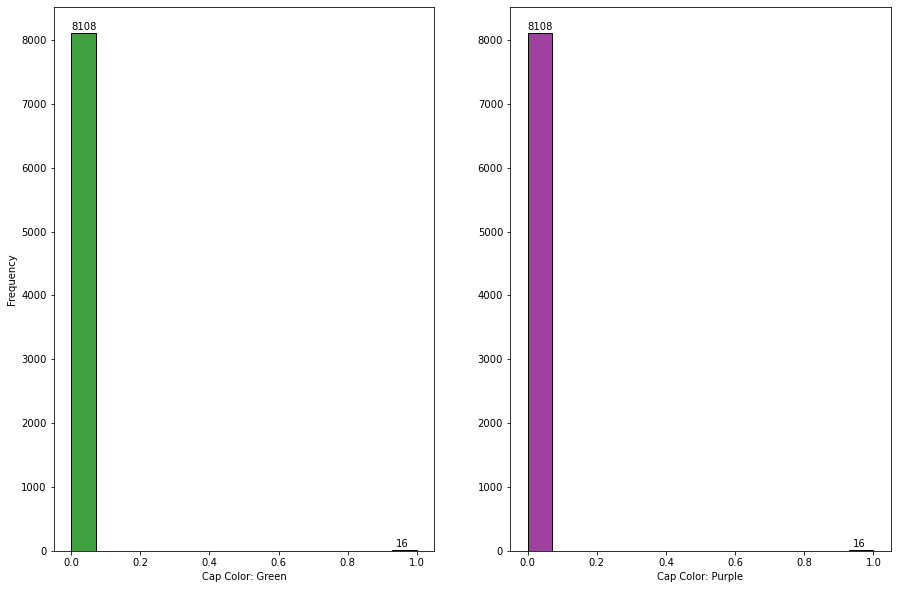

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Cap Color: Green', color="green", ax=axs[0])
ax.text(0.0, 8158, '8108')
ax.text(0.94, 66, '16')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Cap Color: Purple', color="purple", ax=axs[1])
ax.text(0.0, 8158, '8108')
ax.text(0.94, 66, '16')
ax.set(ylabel='')

In [51]:
dum['Cap Color: Green'].value_counts()

0    8108
1      16
Name: Cap Color: Green, dtype: int64

In [52]:
dum['Cap Color: Purple'].value_counts()

0    8108
1      16
Name: Cap Color: Purple, dtype: int64

[Text(0, 0.5, '')]

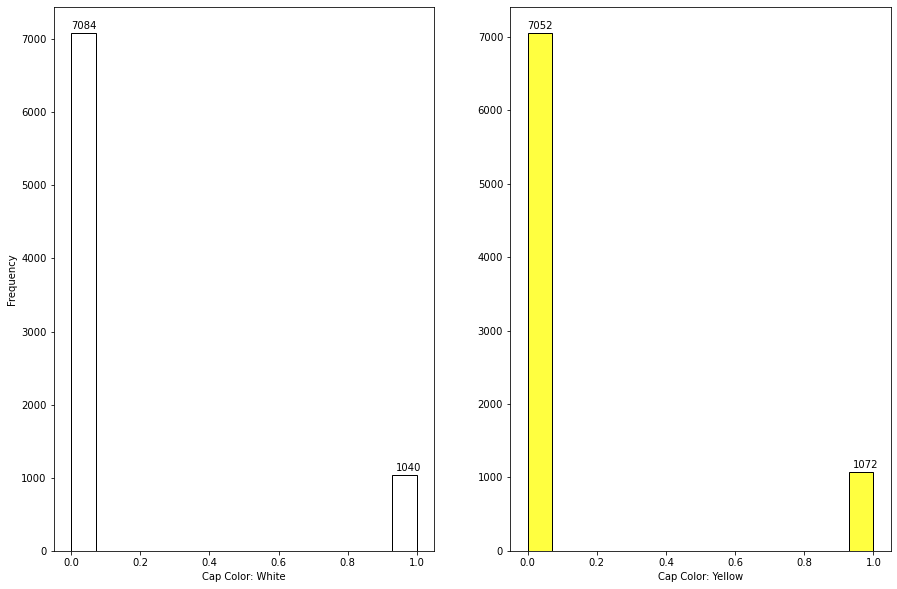

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Cap Color: White', color="white", ax=axs[0])
ax.text(0.0, 7134, '7084')
ax.text(0.94, 1090, '1040')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Cap Color: Yellow', color="yellow", ax=axs[1])
ax.text(0.0, 7102, '7052')
ax.text(0.94, 1122, '1072')
ax.set(ylabel='')

In [56]:
dum['Cap Color: White'].value_counts()

0    7084
1    1040
Name: Cap Color: White, dtype: int64

In [57]:
dum['Cap Color: Yellow'].value_counts()

0    7052
1    1072
Name: Cap Color: Yellow, dtype: int64

Now we move on to Gill Color:

[Text(0, 0.5, '')]

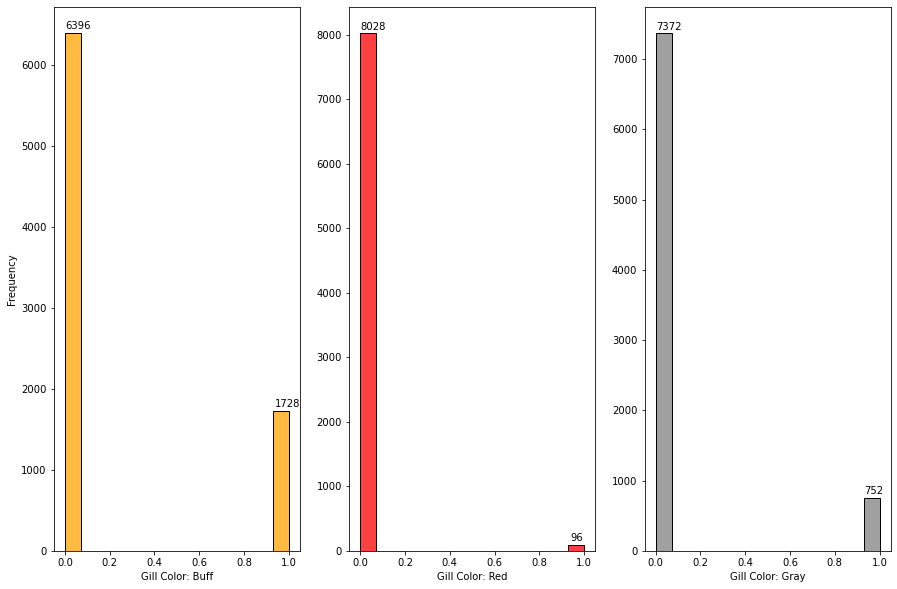

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Gill Color: Buff', color="orange", ax=axs[0])
ax.text(0.0, 6446, '6396')
ax.text(0.94, 1778, '1728')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Gill Color: Red', color="red", ax=axs[1])
ax.text(0.0, 8078, '8028')
ax.text(0.94, 146, '96')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x='Gill Color: Gray', color="gray", ax=axs[2])
ax.text(0.0, 7422, '7372')
ax.text(0.93, 802, '752')
ax.set(ylabel='')

In [59]:
dum['Gill Color: Buff'].value_counts()

0    6396
1    1728
Name: Gill Color: Buff, dtype: int64

In [60]:
dum['Gill Color: Red'].value_counts()

0    8028
1      96
Name: Gill Color: Red, dtype: int64

In [61]:
dum['Gill Color: Gray'].value_counts()

0    7372
1     752
Name: Gill Color: Gray, dtype: int64

[Text(0, 0.5, '')]

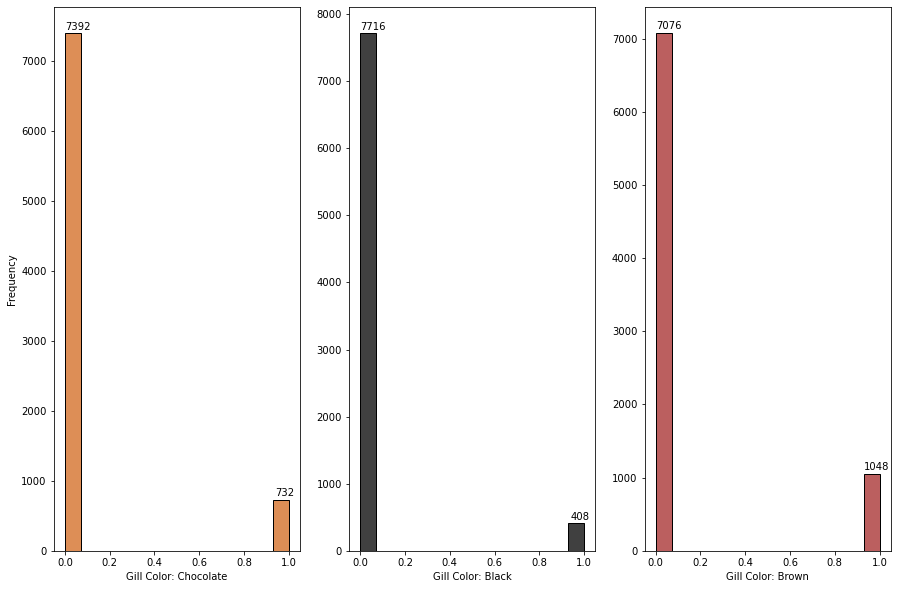

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Gill Color: Chocolate', color="chocolate", ax=axs[0])
ax.text(0.0, 7442, '7392')
ax.text(0.94, 782, '732')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Gill Color: Black', color="black", ax=axs[1])
ax.text(0.0, 7766, '7716')
ax.text(0.94, 458, '408')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x='Gill Color: Brown', color="brown", ax=axs[2])
ax.text(0.0, 7126, '7076')
ax.text(0.93, 1098, '1048')
ax.set(ylabel='')

In [63]:
dum['Gill Color: Chocolate'].value_counts()

0    7392
1     732
Name: Gill Color: Chocolate, dtype: int64

In [64]:
dum['Gill Color: Black'].value_counts()

0    7716
1     408
Name: Gill Color: Black, dtype: int64

In [65]:
dum['Gill Color: Brown'].value_counts()

0    7076
1    1048
Name: Gill Color: Brown, dtype: int64

[Text(0, 0.5, '')]

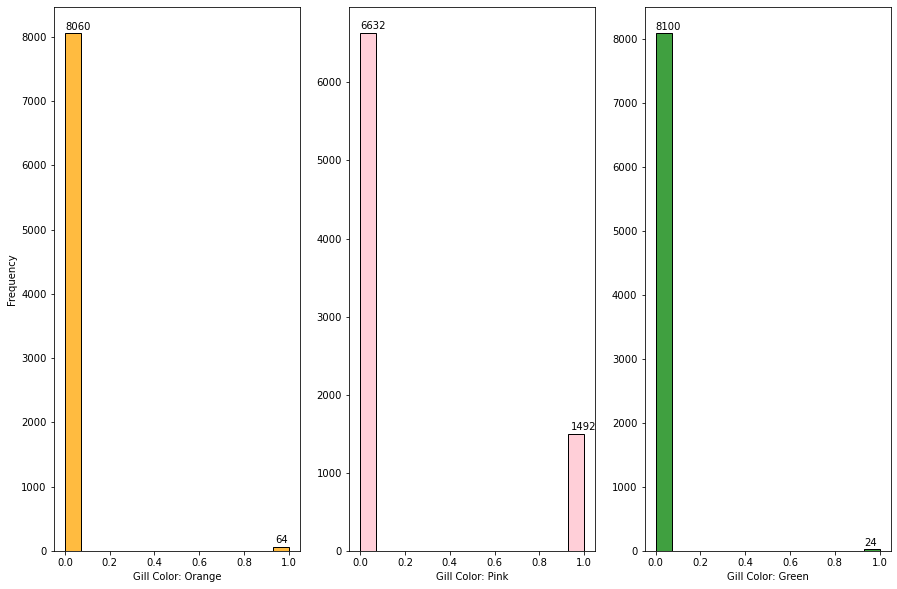

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Gill Color: Orange', color="orange", ax=axs[0])
ax.text(0.0, 8110, '8060')
ax.text(0.94, 114, '64')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Gill Color: Pink', color="pink", ax=axs[1])
ax.text(0.0, 6682, '6632')
ax.text(0.94, 1542, '1492')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x='Gill Color: Green', color="green", ax=axs[2])
ax.text(0.0, 8150, '8100')
ax.text(0.93, 74, '24')
ax.set(ylabel='')

In [68]:
dum['Gill Color: Orange'].value_counts()

0    8060
1      64
Name: Gill Color: Orange, dtype: int64

In [69]:
dum['Gill Color: Pink'].value_counts()

0    6632
1    1492
Name: Gill Color: Pink, dtype: int64

In [70]:
dum['Gill Color: Green'].value_counts()

0    8100
1      24
Name: Gill Color: Green, dtype: int64

[Text(0, 0.5, '')]

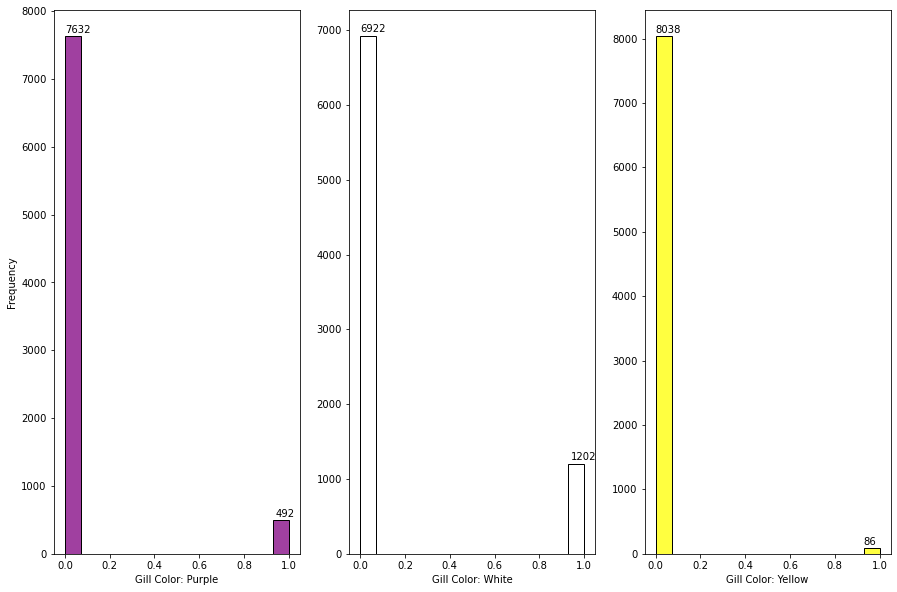

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Gill Color: Purple', color="purple", ax=axs[0])
ax.text(0.0, 7682, '7632')
ax.text(0.94, 542, '492')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Gill Color: White', color="white", ax=axs[1])
ax.text(0.0, 6972, '6922')
ax.text(0.94, 1252, '1202')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x='Gill Color: Yellow', color="yellow", ax=axs[2])
ax.text(0.0, 8088, '8038')
ax.text(0.93, 136, '86')
ax.set(ylabel='')

In [71]:
dum['Gill Color: Purple'].value_counts()

0    7632
1     492
Name: Gill Color: Purple, dtype: int64

In [72]:
dum['Gill Color: White'].value_counts()

0    6922
1    1202
Name: Gill Color: White, dtype: int64

In [73]:
dum['Gill Color: Yellow'].value_counts()

0    8038
1      86
Name: Gill Color: Yellow, dtype: int64

Lastly, we look at the Habitat:

[Text(0, 0.5, '')]

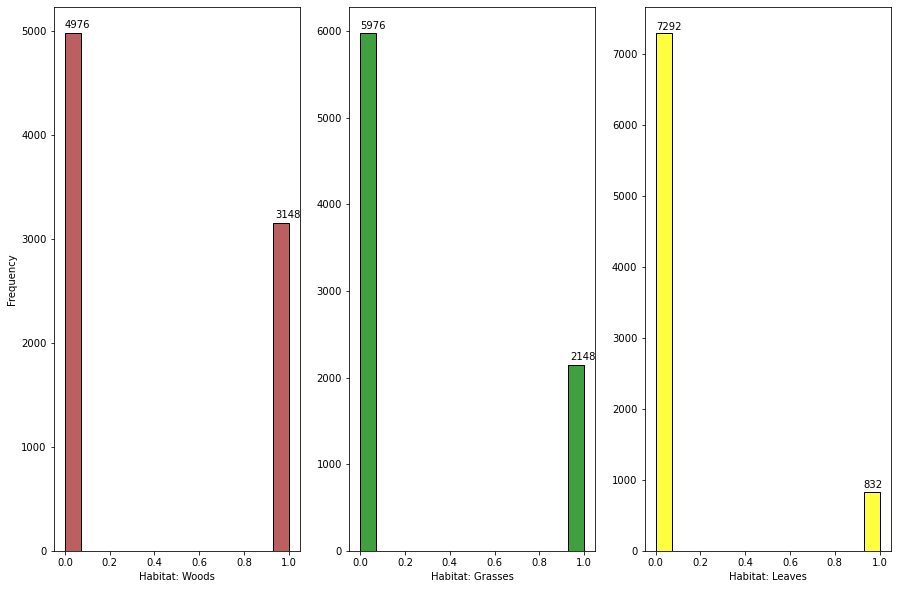

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Habitat: Woods', color="brown", ax=axs[0])
ax.text(0.0, 5026, '4976')
ax.text(0.94, 3198, '3148')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Habitat: Grasses', color="green", ax=axs[1])
ax.text(0.0, 6026, '5976')
ax.text(0.94, 2198, '2148')
ax.set(ylabel='')
ax = sns.histplot(data=dum, x='Habitat: Leaves', color="yellow", ax=axs[2])
ax.text(0.0, 7342, '7292')
ax.text(0.93, 882, '832')
ax.set(ylabel='')

In [76]:
dum['Habitat: Woods'].value_counts()

0    4976
1    3148
Name: Habitat: Woods, dtype: int64

In [77]:
dum['Habitat: Grasses'].value_counts()

0    5976
1    2148
Name: Habitat: Grasses, dtype: int64

In [78]:
dum['Habitat: Leaves'].value_counts()

0    7292
1     832
Name: Habitat: Leaves, dtype: int64

[Text(0, 0.5, '')]

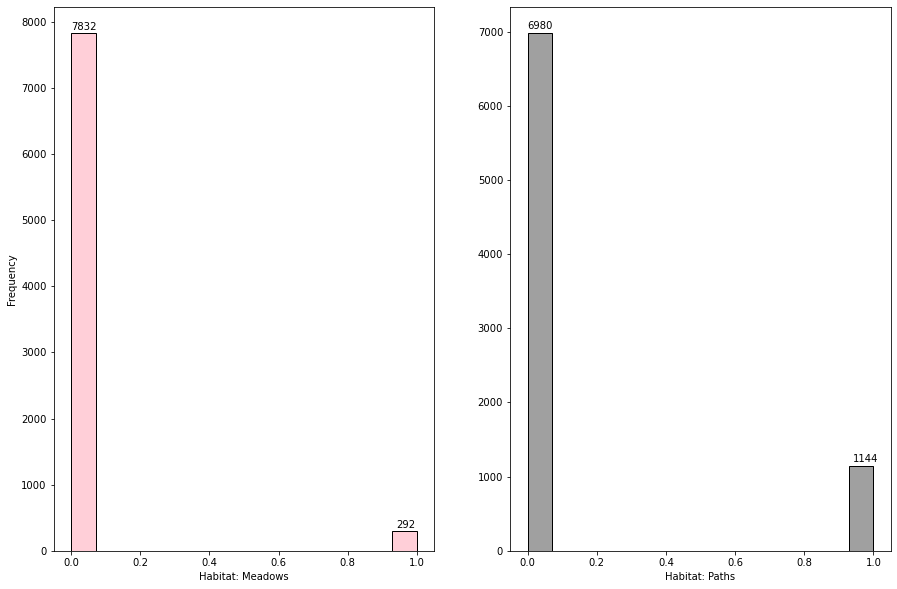

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Habitat: Meadows', color="pink", ax=axs[0])
ax.text(0.0, 7882, '7832')
ax.text(0.94, 342, '292')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Habitat: Paths', color="gray", ax=axs[1])
ax.text(0.0, 7030, '6980')
ax.text(0.94, 1194, '1144')
ax.set(ylabel='')

In [80]:
dum['Habitat: Meadows'].value_counts()

0    7832
1     292
Name: Habitat: Meadows, dtype: int64

In [81]:
dum['Habitat: Paths'].value_counts()

0    6980
1    1144
Name: Habitat: Paths, dtype: int64

[Text(0, 0.5, '')]

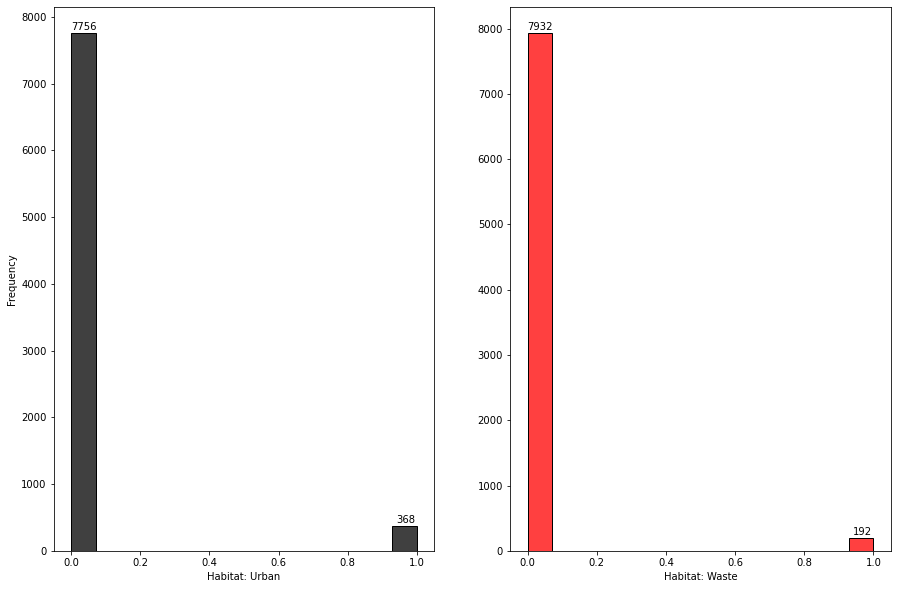

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

ax = sns.histplot(data=dum, x='Habitat: Urban', color="black", ax=axs[0])
ax.text(0.0, 7806, '7756')
ax.text(0.94, 418, '368')
ax.set(ylabel='Frequency')
ax = sns.histplot(data=dum, x='Habitat: Waste', color="red", ax=axs[1])
ax.text(0.0, 7982, '7932')
ax.text(0.94, 242, '192')
ax.set(ylabel='')

In [82]:
dum['Habitat: Urban'].value_counts()

0    7756
1     368
Name: Habitat: Urban, dtype: int64

In [83]:
dum['Habitat: Waste'].value_counts()

0    7932
1     192
Name: Habitat: Waste, dtype: int64

### Conclusions:

For every single odor, cap color, gill color, and habitat, there are more edible mushrooms than poison ones.  While there is one that is relatively close, almost all of them have the overwhelmingly majority as edible; with some even having as little as 16 poisonious out of 8124.

This will help provide the basis for the predictive model we are about to make for Phase II.

## Phase II: Build Predictive Models

I have decided to use a KNN model to try and predict for each of the values if a new one would be edible or poisonious.

First thing is to import he sklearn.neighbors from KNeighborsClassifier which will allow us to make our predictive model.

In [136]:
from sklearn.neighbors import KNeighborsClassifier

Since the predictive model is based off arrays, we have to create new arrays that contain all our data for the odors, cap color, gill color, and habitat.

In [140]:
col = ['Odor: Almond', 'Odor: Creosote', 'Odor: Foul', 'Odor: Anise', 'Odor: Musty', 'Odor: None',
       'Odor: Pungent', 'Odor: Spicy', 'Odor: Fishy']
dum_odor = pd.DataFrame(dum,columns=col)
odor_arr = dum_odor.to_numpy()
odor_arr

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [141]:
col = ['Cap Color: Buff', 'Cap Color: Cinnamon', 'Cap Color: Red', 'Cap Color: Gray',
       'Cap Color: Brown','Cap Color: Pink', 'Cap Color: Green', 'Cap Color: Purple','Cap Color: White', 'Cap Color: Yellow']
dum_cap = pd.DataFrame(dum,columns=col)
cap_arr = dum_cap.to_numpy()
cap_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [142]:
col = ['Gill Color: Buff', 'Gill Color: Red', 'Gill Color: Gray', 'Gill Color: Chocolate',
       'Gill Color: Black', 'Gill Color: Brown', 'Gill Color: Orange', 'Gill Color: Pink', 'Gill Color: Green',
       'Gill Color: Purple', 'Gill Color: White', 'Gill Color: Yellow']
dum_gill = pd.DataFrame(dum,columns=col)
gill_arr = dum_gill.to_numpy()
gill_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [143]:
col = ['Habitat: Woods', 'Habitat: Grasses', 'Habitat: Leaves', 'Habitat: Meadows',
       'Habitat: Paths', 'Habitat: Urban', 'Habitat: Waste']
dum_habitat = pd.DataFrame(dum,columns=col)
habitat_arr = dum_habitat.to_numpy()
habitat_arr

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [144]:
habitat_arr.shape

(8124, 7)

Once that is done, we can make our target array.  This is done making our target array, called target_arr, and filling it with zeros so that we can replace it with the 'Edible/Poison Ind' values.  For that, we create a new dataframe that just contains the column 'Edible/Poison Ind' and its data.  We convert it to a numpy array, and then we go through every value in it and equate it to the corresponding location in target_arr.

In [145]:
target_arr = np.zeros(len(habitat_arr))
col = ['Edible/Poison Ind']
target = pd.DataFrame(dum,columns=col)
target1 = target.to_numpy()
for a in range(0,len(habitat_arr)):
    target_arr[a] = target1[a][0]
target_arr

array([1., 0., 0., ..., 0., 1., 0.])

Now we can run our predictive function.  Using x as what our predictive array will be based on and y as what our target array will be based one, we crate the variable knn which will be the KNeighborsClassifier.  We then fit it for our x and y values.

In [156]:
x = odor_arr
y = target_arr
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [157]:
knn

KNeighborsClassifier(n_neighbors=1)

From here, we can run our prediction for the first possible variance just to see if it works.

Source: https://stackoverflow.com/questions/66138731/valueerror-expected-2d-array-got-1d-array-instead-array-19-27-896-0-1-0

In [163]:
knn.predict([[1,0,0,0,0,0,0,0,0]])

array([0.])

Now that we see that it works, we can run it for all the possible values.

In [166]:
x_new = [[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1]]
knn.predict(x_new)

array([0., 1., 1., 0., 1., 0., 1., 1., 1.])

Now we reset our x value and repeat with the other categories.

In [167]:
x = cap_arr
y = target_arr
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [170]:
x_new = [[1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1]]
knn.predict(x_new)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [171]:
x = gill_arr
y = target_arr
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [174]:
x_new = [[1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,1]]
knn.predict(x_new)

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.])

In [175]:
x = habitat_arr
y = target_arr
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [178]:
x_new = [[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]]
knn.predict(x_new)

array([1., 1., 1., 0., 0., 1., 0.])

### Conclusions

From our prediction model, we can determine the following:

For odors,[0., 1., 1., 0., 1., 0., 1., 1., 1.], we can see that 'Odor: Creosote', 'Odor: Foul', 'Odor: Musty', 'Odor: Pungent', 'Odor: Spicy', and 'Odor: Fishy' would all be poisonious while the others would be edible.

I think this is a decent model for odors but it is not the best.  While it had 'Odor: Foul' being poisonious, which it most likely would be based off of its numbers, it didn't have 'Odor: None' as one and that was the one odor that had the most poisonious values.  That alone, makes me not see this as perfect.

For cap color, [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], we see that only 'Cap Color: Pink' would be poisonious while all the others would be edible.

I think this isn't that accurate because 'Cap Color: Pink' has only 144 being poisonious while there are some like 'Cap Color: Brown' that has 2284 poisonious entries but was predicted as edible.

For gill color, [1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.], 'Gill Color: Buff', 'Gill Color: Black', 'Gill Color: Brown', 'Gill Color: Pink', and 'Gill Color: Green' would be poisonious while all the others would be edible.

I think this one is the second best of our prediction models.  The ones selected as poisonious by the model are the ones with the higher percentage of poisonious values.

For habitat, [1., 1., 1., 0., 0., 1., 0.], 'Habitat: Woods', 'Habitat: Grasses', 'Habitat: Leaves', and 'Habitat: Urban' would be poisonious while all the others would be edible.

This is the best prediction model of the four.  The ones that were most likely to be poisonious from this prediction model, were.


Using a KNN prediction model, I will say the only value that I tested that would be worth using it on would be the habitat values.